In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('/Users/ness001/Downloads/datas/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]]
y = dataset.iloc[:, 4]
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# 标准化

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


# 利用lgbm的sklearn接口训练

In [4]:
import lightgbm as lgb
model=lgb.sklearn.LGBMClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.91


/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# lgbm自带训练

In [5]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [6]:
y_pred=clf.predict(x_test)


In [7]:
y_pred.shape

(100,)

In [8]:
for i in range(0,100):
    if y_pred[i]>=.500:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [9]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# evaluation

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.76


# confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm 

array([[68, 24],
       [ 0,  8]])

In [12]:
import seaborn as sns

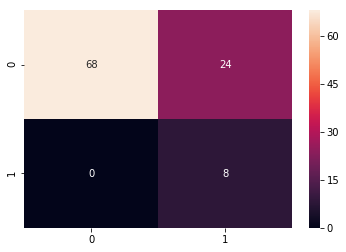

In [13]:
sns.heatmap(data=cm,annot=True)

In [17]:
from sklearn.metrics import classification_report
cr=classification_report(y_pred,y_test)
print(cr)

              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85        92
         1.0       0.25      1.00      0.40         8

   micro avg       0.76      0.76      0.76       100
   macro avg       0.62      0.87      0.62       100
weighted avg       0.94      0.76      0.81       100



### ⚠️ 非sklearn中的模型不能使用交叉检验

In [25]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(clf,x_train,y_train,cv=3 )

TypeError: estimator should be an estimator implementing 'fit' method, <lightgbm.basic.Booster object at 0x10920d2b0> was passed